IMERSÃO DE DADOS PYTHON ALURA - MATEUS HENRIQUE 🧑‍🚀🎲
---

---
AULA 1 🚀
---
* Explorando Dados com Pandas 🐼

In [4]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomeando as colunas do DataFrame

In [9]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}



# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Analisando quais sãos as categorias das colunas categóricas

---
*Nível de senioridade*

In [10]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

SE    77241
MI    40465
EN    12443
EX     3200
Name: senioridade, dtype: int64

| Sigla | Significado | Descrição                                  |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


---
*Regime de Trabalho*

In [11]:
df["remoto"].value_counts()

0      105312
100     27718
50        319
Name: remoto, dtype: int64

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  | 
| 50    | Híbrido     |
| 100   |  Remoto     |

---
*Tamanho da Empresa*

In [12]:
df["tamanho_empresa"].value_counts()

M    129561
L      3574
S       214
Name: tamanho_empresa, dtype: int64

| Sigla | Significado |
|-------|-------------|
| M     | Mid(Média)  | 
| S     | Small(Pequena)     |
| L     |  Large(Grande)     |

---
*Tipo de Contrato*

In [13]:
df['contrato'].value_counts()

FT    132563
CT       394
PT       376
FL        16
Name: contrato, dtype: int64

| Sigla | Significado |
|-------|-------------|
| FT     | Full-time  | 
| CT     | Contract     |
| PT     |  Part-time     |
| FL     |  Freelance     |

---
*Modificando o Nome Das Categorias*

In [14]:
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

Sênior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: senioridade, dtype: int64

In [15]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

integral      132563
contrato         394
parcial          376
freelancer        16
Name: contrato, dtype: int64

In [16]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

media      129561
grande       3574
pequena       214
Name: tamanho_empresa, dtype: int64

In [17]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,integral,Solutions Engineer,214000,USD,214000,US,100,US,media
1,2025.0,Sênior,integral,Solutions Engineer,136000,USD,136000,US,100,US,media
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,0,AU,media
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,0,AU,media
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,0,US,media


In [18]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,Sênior,integral,Data Scientist,USD,US,US,media
freq,77241,132563,17314,126140,119579,119641,129561


In [19]:
df.describe()

,ano,salario,usd,remoto
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


---
AULA 2 🚀
---
* Aprendendo a Limpar e Preparar Dados 🧹

In [20]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,integral,Solutions Engineer,214000,USD,214000,US,100,US,media
1,2025.0,Sênior,integral,Solutions Engineer,136000,USD,136000,US,100,US,media
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,0,AU,media
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,0,AU,media
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,0,US,media


In [21]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [22]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

`Nam` = Vazio

In [23]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,integral,Product Manager,184500,USD,184500,US,0,US,media
59692,NaN,Pleno,integral,Engineer,110000,USD,110000,DE,0,DE,media
59710,NaN,Junior,integral,Data Scientist,208800,USD,208800,US,0,US,media
59759,NaN,Sênior,integral,Software Engineer,135000,USD,135000,US,0,US,media
59789,NaN,Sênior,integral,Engineer,112000,USD,112000,US,0,US,media
131000,NaN,Sênior,integral,Machine Learning Engineer,163800,USD,163800,US,0,US,media
131006,NaN,Sênior,integral,Data Analytics Manager,204500,USD,204500,US,0,US,media
133054,NaN,Junior,integral,Data Scientist,40000,USD,40000,JP,100,MY,grande
133281,NaN,Pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,grande
133317,NaN,Pleno,integral,Data Scientist,130000,USD,130000,US,50,US,grande


In [24]:
#Criando DataFrame para identificar valores nulos
df_salarios = pd.DataFrame({
    'nome': ["Mateus" , "Augusto" , "Odair" , "Lucas"],
    'salario': [9000, np.nan, 5000, np.nan]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios

,nome,salario,salario_media
0,Mateus,9000.0,9000.0
1,Augusto,NaN,7000.0
2,Odair,5000.0,5000.0
3,Lucas,NaN,7000.0


In [25]:
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda-Feira", "Teça-Feira", "Quarta-Feira", "Quinta-Feira", "Sexta-Feira"],
    'Temperatura': [32 , np.nan , 28 , 40 , 13],
})

df_temperaturas["preenchido_bfill"] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda-Feira,32.0,32.0
1,Teça-Feira,NaN,28.0
2,Quarta-Feira,28.0,28.0
3,Quinta-Feira,40.0,40.0
4,Sexta-Feira,13.0,13.0


In [26]:
df_cidades = pd.DataFrame({
    'nome': ["Mateus" , "Leonardo" , "Laura" , "Rafael"],
    'cidade': ["SP - São Paulo" , "RJ - Rio de Janeiro" , np.nan , np.nan]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Mateus,SP - São Paulo,SP - São Paulo
1,Leonardo,RJ - Rio de Janeiro,RJ - Rio de Janeiro
2,Laura,NaN,Não Informado
3,Rafael,NaN,Não Informado


In [27]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [28]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,integral,Solutions Engineer,214000,USD,214000,US,100,US,media
1,2025.0,Sênior,integral,Solutions Engineer,136000,USD,136000,US,100,US,media
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,0,AU,media
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,0,AU,media
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,0,US,media


In [29]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  int64  
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [30]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype("int64"))
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,integral,Solutions Engineer,214000,USD,214000,US,100,US,media
1,2025,Sênior,integral,Solutions Engineer,136000,USD,136000,US,100,US,media
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,0,AU,media
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,0,AU,media
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,0,US,media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Sênior,integral,Data Scientist,412000,USD,412000,US,100,US,grande
133345,2021,Pleno,integral,Principal Data Scientist,151000,USD,151000,US,100,US,grande
133346,2020,Junior,integral,Data Scientist,105000,USD,105000,US,100,US,pequena
133347,2020,Junior,contrato,Business Data Analyst,100000,USD,100000,US,100,US,grande


---
AULA 3 🚀
---
* Aprendendo a Criar e Visualizar Gráficos 📊

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,integral,Solutions Engineer,214000,USD,214000,US,100,US,media
1,2025,Sênior,integral,Solutions Engineer,136000,USD,136000,US,100,US,media
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,0,AU,media
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,0,AU,media
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,0,US,media


<Axes: title={'center': 'Distribuição de senioridade'}>

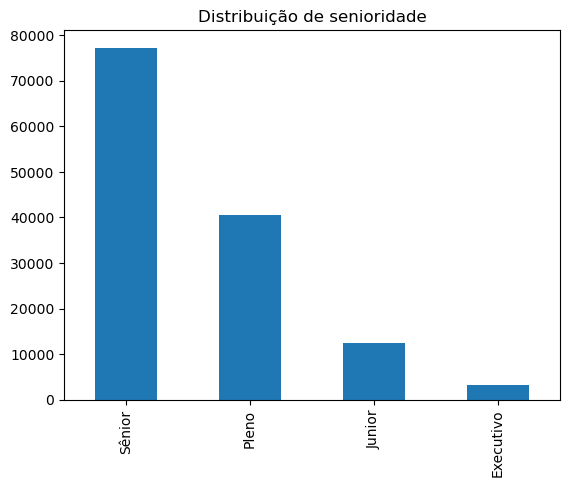

In [32]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")